# KNN

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import pearsonr
from sklearn.preprocessing import normalize
import math

In [2]:
rs_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('Dataset/ml-100k/ua.base', sep='\t', names=rs_cols, encoding='latin-1')
ratings

user_id  movie_id  rating  unix_timestamp
0            1         1       5       874965758
1            1         2       3       876893171
2            1         3       4       878542960
3            1         4       3       876893119
4            1         5       3       889751712
...        ...       ...     ...             ...
90565      943      1047       2       875502146
90566      943      1074       4       888640250
90567      943      1188       3       888640250
90568      943      1228       3       888640275
90569      943      1330       3       888692465

[90570 rows x 4 columns]

In [3]:
user_ratings = ratings.groupby('user_id')

In [4]:
user_ratings = {}
for k, v in ratings.groupby('user_id'):
    user_ratings[k] = dict(zip(v['movie_id'].values, v['rating'].values))
user_ratings_test = dict(list(user_ratings.items())[:1000])

In [5]:
class userUserBasedCF(object):
    def __init__(self, dataset):
        self.dataset = dataset
        self.means = {}
        for user, user_ratings in self.dataset.items():
            mean = np.mean(np.array(list(user_ratings.values())))
            self.means[user] = mean

    def pearson_correlation(self, user1, user2):
        """
        user1, user2: dictionaries
        """
        common_movies = sorted(set(user1).intersection(set(user2)))
        if len(common_movies) != 0 and len(common_movies) != 1:
            user1_ratings = np.squeeze(normalize(np.array([user1[movie] for movie in common_movies])[np.newaxis, :]))
            user2_ratings = np.squeeze(normalize(np.array([user2[movie] for movie in common_movies])[np.newaxis, :]))
            corr = pearsonr(user1_ratings, user2_ratings)[0]
        else:
            corr = 0
            #print("No common movies")
        return corr
    
    def knn(self, user, k):
        """
        user: user_id
        k: number of KNN
        """
        neighbours={}
        i = 0
        for user_id, user_data in self.dataset.items():
            if user_id == user:
                continue
            corr = self.pearson_correlation(self.dataset[user], user_data)
            neighbours[user_id] = corr
            i+=1
        sort = sorted(neighbours.items(), key=lambda x: x[1], reverse = True)
        knn = sort[:k]
        knn_user_ids = [user_id for user_id, user_corr in knn]
        print("KNN")
        return knn_user_ids
    
    def predict(self, user, movie_id, knn):
        """
        user: user_id
        movie_id: movie_id
        knn: knn_user_ids
        
        prediction = mean_rating_of_active_user + sum_over_knn(user_rating_for_i * pearson(user, active_user))/sum_over_knn(pearson(user, active_user))
        """
        mean_user_rating = self.means[user]
        print("Mean user rating for the user is ", mean_user_rating)
        iter_rating = 0.0
        pear_corr = 0.0
        for i, element in enumerate(knn):
            temp_corr = self.pearson_correlation(self.dataset[user], self.dataset[element])
            if math.isnan(temp_corr):
                continue
            if movie_id in self.dataset[element].keys():
                iter_rating += (self.dataset[element][movie_id]-self.means[element]) * temp_corr
            else:
                iter_rating += 0
            pear_corr += temp_corr
            
        pred = mean_user_rating + iter_rating/pear_corr
        return pred

In [6]:
cf = userUserBasedCF(user_ratings_test)

In [7]:
import warnings
warnings.filterwarnings('ignore')
knn = cf.knn(3, 100)
cf.predict(3, 45, knn)

KNN
Mean user rating for the user is  2.909090909090909


2.8676009731020873

In [8]:
print(knn)

[27, 34, 36, 41, 42, 45, 46, 48, 481, 56, 236, 29, 24, 52, 14, 10, 44, 49, 57, 47, 8, 54, 15, 33, 5, 9, 11, 12, 17, 20, 22, 23, 25, 32, 37, 40, 51, 53, 55, 13, 7, 1, 4, 35, 2, 43, 18, 16, 21, 26, 30, 58, 6, 31, 39, 28, 19, 50, 38, 60, 65, 66, 71, 75, 81, 82, 84, 74, 83, 86, 96, 101, 117, 88, 68, 72, 91, 64, 85, 62, 76, 113, 59, 104, 116, 90, 69, 109, 73, 94, 67, 93, 95, 97, 98, 103, 106, 108, 114, 63]


In [9]:
ratings_base = pd.read_csv('Dataset/ml-100k/ua.base', sep='\t', names=rs_cols, encoding='latin-1')

In [10]:
n_users_base = ratings_base['user_id'].unique().max()
n_items_base = ratings_base['movie_id'].unique().max()

n_users_base,n_items_base

(943, 1682)

In [11]:
train_matrix = np.zeros((n_users_base, n_items_base))
for line in ratings_base.itertuples():
    train_matrix[line[1]-1,line[2]-1] = line[3]

In [12]:
train_matrix[3,45]

0.0

In [13]:
user_ratings

{1: {1: 5,
  2: 3,
  3: 4,
  4: 3,
  5: 3,
  6: 5,
  7: 4,
  8: 1,
  9: 5,
  10: 3,
  11: 2,
  12: 5,
  13: 5,
  14: 5,
  15: 5,
  16: 5,
  17: 3,
  18: 4,
  19: 5,
  21: 1,
  22: 4,
  23: 4,
  24: 3,
  25: 4,
  26: 3,
  27: 2,
  28: 4,
  29: 1,
  30: 3,
  31: 3,
  32: 5,
  34: 2,
  35: 1,
  36: 2,
  37: 2,
  38: 3,
  39: 4,
  40: 3,
  41: 2,
  42: 5,
  43: 4,
  44: 5,
  45: 5,
  46: 4,
  47: 4,
  48: 5,
  49: 3,
  50: 5,
  51: 4,
  52: 4,
  53: 3,
  54: 3,
  55: 5,
  56: 4,
  57: 5,
  58: 4,
  59: 5,
  60: 5,
  62: 3,
  63: 2,
  64: 5,
  65: 4,
  66: 4,
  67: 3,
  68: 4,
  69: 3,
  70: 3,
  71: 3,
  72: 4,
  73: 3,
  74: 1,
  75: 4,
  76: 4,
  77: 4,
  78: 1,
  79: 4,
  80: 4,
  81: 5,
  82: 5,
  83: 3,
  84: 4,
  85: 3,
  86: 5,
  87: 5,
  88: 4,
  89: 5,
  90: 4,
  91: 5,
  92: 3,
  93: 5,
  94: 2,
  95: 4,
  96: 5,
  97: 3,
  98: 4,
  99: 3,
  100: 5,
  101: 2,
  102: 2,
  103: 1,
  104: 1,
  105: 2,
  106: 4,
  107: 4,
  108: 5,
  109: 5,
  110: 1,
  111: 5,
  112: 1,
  113: 5,
  

In [14]:
user_ratings_test

{1: {1: 5,
  2: 3,
  3: 4,
  4: 3,
  5: 3,
  6: 5,
  7: 4,
  8: 1,
  9: 5,
  10: 3,
  11: 2,
  12: 5,
  13: 5,
  14: 5,
  15: 5,
  16: 5,
  17: 3,
  18: 4,
  19: 5,
  21: 1,
  22: 4,
  23: 4,
  24: 3,
  25: 4,
  26: 3,
  27: 2,
  28: 4,
  29: 1,
  30: 3,
  31: 3,
  32: 5,
  34: 2,
  35: 1,
  36: 2,
  37: 2,
  38: 3,
  39: 4,
  40: 3,
  41: 2,
  42: 5,
  43: 4,
  44: 5,
  45: 5,
  46: 4,
  47: 4,
  48: 5,
  49: 3,
  50: 5,
  51: 4,
  52: 4,
  53: 3,
  54: 3,
  55: 5,
  56: 4,
  57: 5,
  58: 4,
  59: 5,
  60: 5,
  62: 3,
  63: 2,
  64: 5,
  65: 4,
  66: 4,
  67: 3,
  68: 4,
  69: 3,
  70: 3,
  71: 3,
  72: 4,
  73: 3,
  74: 1,
  75: 4,
  76: 4,
  77: 4,
  78: 1,
  79: 4,
  80: 4,
  81: 5,
  82: 5,
  83: 3,
  84: 4,
  85: 3,
  86: 5,
  87: 5,
  88: 4,
  89: 5,
  90: 4,
  91: 5,
  92: 3,
  93: 5,
  94: 2,
  95: 4,
  96: 5,
  97: 3,
  98: 4,
  99: 3,
  100: 5,
  101: 2,
  102: 2,
  103: 1,
  104: 1,
  105: 2,
  106: 4,
  107: 4,
  108: 5,
  109: 5,
  110: 1,
  111: 5,
  112: 1,
  113: 5,
  

In [15]:
len(user_ratings_test.keys())

943

In [16]:
import warnings
warnings.simplefilter("ignore")

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import spatial #To cumopute distance between each pair of the two collections of inputs.
import operator #to perform comparisons between e.g it(a,b) is equal to a<b
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import math

# We add the tables and look at the data we have and combine the tables according to their relations. 

## Let's add u.data and look at the top 10 

In [19]:
columns = ['userid', 'movieid', 'rating', 'timestamp']
ratings = pd.read_csv('Dataset/ml-100k/u.data', sep='\t',names= columns )
ratings.head(10)

userid  movieid  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596
5     298      474       4  884182806
6     115      265       2  881171488
7     253      465       5  891628467
8     305      451       3  886324817
9       6       86       3  883603013

In [20]:
ratings.shape

(100000, 4)

## Let's add u.item and look at the top 10 

In [21]:
# importing the u.item dataset
movie_titles = ['movieid', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'action', 'adventure','animation','childrens', 'comedy','crime','documentary','drama','fantasy','film-nior','horror','musical','mystery','romance','sci-fi','thriler','war','westen']
titles = pd.read_csv('Dataset/ml-100k/u.item', sep='|',encoding='latin-1', names= movie_titles)
titles.head(10)

movieid                                        movie title release date  \
0        1                                   Toy Story (1995)  01-Jan-1995   
1        2                                   GoldenEye (1995)  01-Jan-1995   
2        3                                  Four Rooms (1995)  01-Jan-1995   
3        4                                  Get Shorty (1995)  01-Jan-1995   
4        5                                     Copycat (1995)  01-Jan-1995   
5        6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...  01-Jan-1995   
6        7                              Twelve Monkeys (1995)  01-Jan-1995   
7        8                                        Babe (1995)  01-Jan-1995   
8        9                            Dead Man Walking (1995)  01-Jan-1995   
9       10                                 Richard III (1995)  22-Jan-1996   

   video release date                                           IMDb URL  \
0                 NaN  http://us.imdb.com/M/title-exact?Toy%20Story%2...   
1                 NaN  http://us.imdb.com/M/title-exact?GoldenEye%20(...   
2                 NaN  http://us.imdb.com/M/title-exact?Four%20Rooms%...   
3                 NaN  http://us.imdb.com/M/title-exact?Get%20Shorty%...   
4                 NaN  http://us.imdb.com/M/title-exact?Copycat%20(1995)   
5                 NaN  http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...   
6                 NaN  http://us.imdb.com/M/title-exact?Twelve%20Monk...   
7                 NaN     http://us.imdb.com/M/title-exact?Babe%20(1995)   
8                 NaN  http://us.imdb.com/M/title-exact?Dead%20Man%20...   
9                 NaN  http://us.imdb.com/M/title-exact?Richard%20III...   

   unknown  action  adventure  animation  childrens  ...  fantasy  film-nior  \
0        0       0          0          1          1  ...        0          0   
1        0       1          1          0          0  ...        0          0   
2        0       0          0          0          0  ...        0          0   
3        0       1          0          0          0  ...        0          0   
4        0       0          0          0          0  ...        0          0   
5        0       0          0          0          0  ...        0          0   
6        0       0          0          0          0  ...        0          0   
7        0       0          0          0          1  ...        0          0   
8        0       0          0          0          0  ...        0          0   
9        0       0          0          0          0  ...        0          0   

   horror  musical  mystery  romance  sci-fi  thriler  war  westen  
0       0        0        0        0       0        0    0       0  
1       0        0        0        0       0        1    0       0  
2       0        0        0        0       0        1    0       0  
3       0        0        0        0       0        0    0       0  
4       0        0        0        0       0        1    0       0  
5       0        0        0        0       0        0    0       0  
6       0        0        0        0       1        0    0       0  
7       0        0        0        0       0        0    0       0  
8       0        0        0        0       0        0    0       0  
9       0        0        0        0       0        0    1       0  

[10 rows x 24 columns]

In [22]:
titles.shape

(1682, 24)

## Let's add u.genre and look at the top 10

In [23]:
genType = ['type','genreid']
genre = pd.read_csv('Dataset/ml-100k/u.genre',sep='|',names=genType)
genre.head(10)

type  genreid
0      unknown        0
1       Action        1
2    Adventure        2
3    Animation        3
4   Children's        4
5       Comedy        5
6        Crime        6
7  Documentary        7
8        Drama        8
9      Fantasy        9

In [24]:
genre.shape

(19, 2)

## Let's add u.user and look at the top 10

In [25]:
user_info = ['userid', 'age', 'gender','occupations','zip code']
users = pd.read_csv('Dataset/ml-100k/u.user',sep='|',encoding='latin-1', names= user_info)
users.head(10)

userid  age gender    occupations zip code
0       1   24      M     technician    85711
1       2   53      F          other    94043
2       3   23      M         writer    32067
3       4   24      M     technician    43537
4       5   33      F          other    15213
5       6   42      M      executive    98101
6       7   57      M  administrator    91344
7       8   36      M  administrator    05201
8       9   29      M        student    01002
9      10   53      M         lawyer    90703

In [26]:
users.shape

(943, 5)

## We combine u_data with u_user and sort 

In [27]:
ratings = pd.merge(ratings, users, on= 'userid')
ratings.head()

userid  movieid  rating  timestamp  age gender occupations zip code
0     196      242       3  881250949   49      M      writer    55105
1     196      393       4  881251863   49      M      writer    55105
2     196      381       4  881251728   49      M      writer    55105
3     196      251       3  881251274   49      M      writer    55105
4     196      655       5  881251793   49      M      writer    55105

In [28]:
ratings.shape

(100000, 8)

##  We merge and sort u_data with u_movies 

In [29]:
titles = pd.merge(titles,ratings, on='movieid')
titles.head()

movieid       movie title release date  video release date  \
0        1  Toy Story (1995)  01-Jan-1995                 NaN   
1        1  Toy Story (1995)  01-Jan-1995                 NaN   
2        1  Toy Story (1995)  01-Jan-1995                 NaN   
3        1  Toy Story (1995)  01-Jan-1995                 NaN   
4        1  Toy Story (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
2  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
3  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
4  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   

   adventure  animation  childrens  ...  thriler  war  westen  userid  rating  \
0          0          1          1  ...        0    0       0     244       4   
1          0          1          1  ...        0    0       0     298       5   
2          0          1          1  ...        0    0       0     253       5   
3          0          1          1  ...        0    0       0     305       5   
4          0          1          1  ...        0    0       0       6       4   

   timestamp  age  gender  occupations  zip code  
0  880604405   28       M   technician     80525  
1  884126061   44       M    executive     01581  
2  891628467   26       F    librarian     22903  
3  886323153   23       M   programmer     94086  
4  883599478   42       M    executive     98101  

[5 rows x 31 columns]

In [30]:
titles.shape

(100000, 31)

In [31]:
# highest genre-based ratings 
titles.groupby('movie title')['rating'].mean().sort_values(ascending=False).head(10)

movie title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [32]:
# counts of rates 
titles.groupby('movie title')['rating'].count().sort_values(ascending=False).head(10)

movie title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [33]:
# find the mean value 
meanrating= pd.DataFrame(titles.groupby('movie title')['rating'].mean())
meanrating.round()

rating
movie title                                  
'Til There Was You (1997)                 2.0
1-900 (1994)                              3.0
101 Dalmatians (1996)                     3.0
12 Angry Men (1957)                       4.0
187 (1997)                                3.0
...                                       ...
Young Guns II (1990)                      3.0
Young Poisoner's Handbook, The (1995)     3.0
Zeus and Roxanne (1997)                   2.0
unknown                                   3.0
Á köldum klaka (Cold Fever) (1994)        3.0

[1664 rows x 1 columns]

In [34]:
# add count to table 
meanrating['num of ratings'] = pd.DataFrame(titles.groupby('movie title')['rating'].count())
meanrating.round()

rating  num of ratings
movie title                                                  
'Til There Was You (1997)                 2.0               9
1-900 (1994)                              3.0               5
101 Dalmatians (1996)                     3.0             109
12 Angry Men (1957)                       4.0             125
187 (1997)                                3.0              41
...                                       ...             ...
Young Guns II (1990)                      3.0              44
Young Poisoner's Handbook, The (1995)     3.0              41
Zeus and Roxanne (1997)                   2.0               6
unknown                                   3.0               9
Á köldum klaka (Cold Fever) (1994)        3.0               1

[1664 rows x 2 columns]

In [35]:
# mean rating with genre 
def get(x):
    moviegen = titles.iloc[:,x]==1
    moviegen = titles.iloc[moviegen]
    return moviegen

In [36]:
#importing u.genre dataset 
genType = ['type','genreid']
genre = pd.read_csv('Dataset/ml-100k/u.genre',sep='|',names=genType)
genre.drop(labels = 'genreid', axis = 1)
gens = list(genre['type'].values)
print(gens)

['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


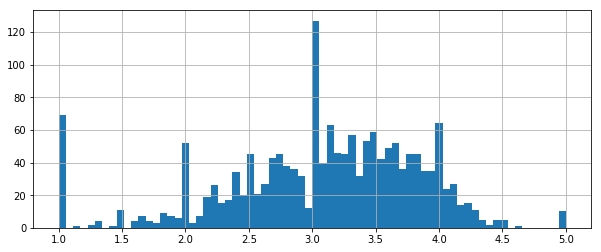

In [37]:
plt.figure(figsize=(10,4))
meanrating['rating'].hist(bins=70)

In [38]:
columns = ['userid', 'movieid', 'rating', 'timestamp']
df = pd.read_csv('Dataset/ml-100k/u.data', sep='\t',names= columns,index_col=0 )
newdf = df.drop(columns=['timestamp'])
newdf.head()

movieid  rating
userid                 
196         242       3
186         302       3
22          377       1
244          51       2
166         346       1

In [39]:
#Creating a new dataframe with the movie title and the rating from each user.
moviemat = titles.pivot_table(index='userid', columns ='movieid', values='rating')
moviemat.head(10)

movieid  1     2     3     4     5     6     7     8     9     10    ...  \
userid                                                               ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
6         4.0   NaN   NaN   NaN   NaN   NaN   2.0   4.0   4.0   NaN  ...   
7         NaN   NaN   NaN   5.0   NaN   NaN   5.0   5.0   5.0   4.0  ...   
8         NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN  ...   
9         NaN   NaN   NaN   NaN   NaN   5.0   4.0   NaN   NaN   NaN  ...   
10        4.0   NaN   NaN   4.0   NaN   NaN   4.0   NaN   4.0   NaN  ...   

movieid  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
userid                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
10        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[10 rows x 1682 columns]

In [40]:
moviemat.shape

(943, 1682)

In [41]:
#Replacing the missing values with the mean of the movie
newMatrix = moviemat.fillna(moviemat.mean()).round(2)

In [42]:
newMatrix.head(10)

movieid  1     2     3     4     5     6     7     8     9     10    ...  \
userid                                                               ...   
1        5.00  3.00  4.00  3.00   3.0  5.00   4.0   1.0   5.0  3.00  ...   
2        4.00  3.21  3.03  3.55   3.3  3.58   3.8   4.0   3.9  2.00  ...   
3        3.88  3.21  3.03  3.55   3.3  3.58   3.8   4.0   3.9  3.83  ...   
4        3.88  3.21  3.03  3.55   3.3  3.58   3.8   4.0   3.9  3.83  ...   
5        4.00  3.00  3.03  3.55   3.3  3.58   3.8   4.0   3.9  3.83  ...   
6        4.00  3.21  3.03  3.55   3.3  3.58   2.0   4.0   4.0  3.83  ...   
7        3.88  3.21  3.03  5.00   3.3  3.58   5.0   5.0   5.0  4.00  ...   
8        3.88  3.21  3.03  3.55   3.3  3.58   3.0   4.0   3.9  3.83  ...   
9        3.88  3.21  3.03  3.55   3.3  5.00   4.0   4.0   3.9  3.83  ...   
10       4.00  3.21  3.03  4.00   3.3  3.58   4.0   4.0   4.0  3.83  ...   

movieid  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
userid                                                               
1         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
2         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
3         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
4         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
5         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
6         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
7         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
8         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
9         3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  
10        3.0   4.0   3.0   2.0   3.0   1.0   3.0   2.0   3.0   3.0  

[10 rows x 1682 columns]

In [43]:
features = ['userid','movieid','rating','timestamp']
traindataset = pd.read_csv('Dataset/ml-100k/u1.base', sep ='\t', names=features)
print(traindataset.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        5       3  889751712


In [44]:
traindataset.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [45]:
traindataset.sum()

userid             42013256
movieid            34056416
rating               282268
timestamp    70685157472259
dtype: int64

In [46]:
traindataset.shape

(80000, 4)

In [47]:
features = ['userid','movieid','rating','timestamp']
testdataset = pd.read_csv('Dataset/ml-100k/u1.test', sep ='\t', names=features)
print(testdataset.head())

   userid  movieid  rating  timestamp
0       1        6       5  887431973
1       1       10       3  875693118
2       1       12       5  878542960
3       1       14       5  874965706
4       1       17       3  875073198


In [48]:
testdataset.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [49]:
testdataset.sum()

userid              4235219
movieid             8496597
rating                70718
timestamp    17667727676603
dtype: int64

In [50]:
testdataset.shape

(20000, 4)

In [51]:
#spliting datasets
X = traindataset.iloc[:,0:2]
y = traindataset.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

In [52]:
#Feature Scaling 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [53]:
math.sqrt(len(y_test))

126.49110640673517

In [54]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [55]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [56]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [57]:
y_pred

array([3, 4, 3, ..., 3, 3, 4], dtype=int64)

In [58]:
#evaluation model
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[  10    0  289  570   33]
 [   5    0  535 1307   54]
 [  10    0 1165 3136  140]
 [  13    0 1162 4089  165]
 [   3    0  557 2615  142]]


In [59]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.17149855116254667


In [60]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.337875


In [61]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.4461875

# U2.BASE DATASET AND U2.TEST DATASET

In [62]:
features = ['userid','movieid','rating','timestamp']
traindataset2 = pd.read_csv('Dataset/ml-100k/u2.base', sep ='\t', names=features)
print(traindataset2.head())

   userid  movieid  rating  timestamp
0       1        3       4  878542960
1       1        4       3  876893119
2       1        5       3  889751712
3       1        6       5  887431973
4       1        7       4  875071561


In [63]:
traindataset2.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [64]:
traindataset2.sum()

userid             39560651
movieid            33999239
rating               282117
timestamp    70683739483331
dtype: int64

In [65]:
traindataset2.shape

(80000, 4)

In [66]:
features = ['userid','movieid','rating','timestamp']
testdataset2 = pd.read_csv('Dataset/ml-100k/u2.test', sep ='\t', names=features)
print(testdataset2.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        8       1  875072484
3       1        9       5  878543541
4       1       21       1  878542772


In [67]:
testdataset2.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [68]:
testdataset2.sum()

userid              6687824
movieid             8553774
rating                70869
timestamp    17669145665531
dtype: int64

In [69]:
testdataset2.shape

(20000, 4)

In [70]:
#spliting datasets
X2 = traindataset2.iloc[:,0:2]
y2 = traindataset2.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=0, test_size = 0.2)

In [71]:
#Feature Scaling 
sc_X2 = StandardScaler()
X_train = sc_X2.fit_transform(X_train)
X_test = sc_X2.transform(X_test)

In [72]:
math.sqrt(len(y_test))

126.49110640673517

In [73]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [74]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [75]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [76]:
y_pred

array([3, 4, 3, ..., 3, 4, 5], dtype=int64)

In [77]:
#evaluation model
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[  20    2  293  595   18]
 [  12    2  547 1217   36]
 [   5    4 1191 3137  114]
 [  18    4 1149 4076  171]
 [  10    2  595 2660  122]]


In [78]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.17441159261279868


In [79]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.3381875


In [80]:
#mean_squared_error

mean_squared_error(y_pred, y_test)

1.4313125

# U3.BASE DATASET AND U3.TEST DATASET

In [81]:
a=np.array([[5,1231,53,123],[1234,123,2,4],[123,455,12,86]])

In [82]:
a

array([[   5, 1231,   53,  123],
       [1234,  123,    2,    4],
       [ 123,  455,   12,   86]])

In [83]:
a.argsort()

array([[0, 2, 3, 1],
       [2, 3, 1, 0],
       [2, 3, 0, 1]], dtype=int64)

In [84]:
a.argsort()[:,2:]# stunları alıyor soldan sağ doğru gidyor

array([[3, 1],
       [1, 0],
       [0, 1]], dtype=int64)

In [85]:
a.argsort()[:,2:][:,::-1] # doğru çalışıyor indexleri doğru arlıyor

array([[1, 3],
       [0, 1],
       [1, 0]], dtype=int64)

In [86]:
features = ['userid','movieid','rating','timestamp']
traindataset3 = pd.read_csv('Dataset/ml-100k/u3.base', sep ='\t', names=features)
print(traindataset3.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        6       5  887431973


In [87]:
#checkng for null values
traindataset3.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [88]:
traindataset3.sum()

userid             36431188
movieid            34046417
rating               282487
timestamp    70678510410518
dtype: int64

In [89]:
traindataset3.shape

(80000, 4)

In [90]:
features = ['userid','movieid','rating','timestamp']
testdataset3 = pd.read_csv('Dataset/ml-100k/u3.test', sep ='\t', names=features)
print(testdataset3.head())

   userid  movieid  rating  timestamp
0       1        5       3  889751712
1       1       11       2  875072262
2       1       16       5  878543541
3       1       25       4  875071805
4       1       35       1  878542420


In [91]:
testdataset3.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [92]:
testdataset3.sum()

userid              9817287
movieid             8506596
rating                70499
timestamp    17674374738344
dtype: int64

In [93]:
testdataset3.shape

(20000, 4)

In [94]:
#spliting datasets
X3 = traindataset3.iloc[:,0:2]
y3 = traindataset3.iloc[:,2]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size = 0.2)

In [95]:
#Feature Scaling 
sc_X3 = StandardScaler()
X3_train = sc_X3.fit_transform(X3_train)
X3_test = sc_X3.transform(X3_test)

In [96]:
math.sqrt(len(y_test))

126.49110640673517

In [97]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [98]:
#fiting the model
classifier.fit(X3_train, y3_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [99]:
#predicting the test set results
y_pred = classifier.predict(X3_test)

In [100]:
y_pred

array([4, 3, 4, ..., 3, 4, 4], dtype=int64)

In [101]:
#evaluation model
cm3 = confusion_matrix(y_test, y_pred)
print(cm3)

[[   4    1  226  661   36]
 [   7    2  417 1317   71]
 [  10    2 1084 3215  140]
 [  19    1 1272 3922  204]
 [  10    3  783 2475  118]]


In [102]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.1589050898769749


In [103]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.320625


In [104]:
mean_squared_error(y_pred, y_test)

1.5639375

# U4.BASE DATASET AND U4.TEST DATASET

In [105]:
features = ['userid','movieid','rating','timestamp']
traindataset4 = pd.read_csv('Dataset/ml-100k/u4.base', sep ='\t', names=features)
print(traindataset4.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        5       3  889751712
4       1        6       5  887431973


In [106]:
traindataset4.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [107]:
traindataset4.sum()

userid             33828257
movieid            34096233
rating               282549
timestamp    70682380062248
dtype: int64

In [108]:
traindataset4.shape

(80000, 4)

In [109]:
features = ['userid','movieid','rating','timestamp']
testdataset4 = pd.read_csv('Dataset/ml-100k/u4.test', sep ='\t', names=features)
print(testdataset4.head())

   userid  movieid  rating  timestamp
0       1        4       3  876893119
1       1        7       4  875071561
2       1       42       5  876892425
3       1       43       4  878542869
4       1       55       5  875072688


In [110]:
testdataset4.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [111]:
testdataset4.sum()

userid             12420218
movieid             8456780
rating                70437
timestamp    17670505086614
dtype: int64

In [112]:
testdataset4.shape

(20000, 4)

In [113]:
#spliting datasets
X4 = traindataset4.iloc[:,0:2]
y4 = traindataset4.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X4, y4, random_state=0, test_size = 0.2)

In [114]:
#Feature Scaling 
sc_X4 = StandardScaler()
X_train = sc_X4.fit_transform(X_train)
X_test = sc_X4.transform(X_test)

In [115]:
math.sqrt(len(y_test))

126.49110640673517

In [116]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=125, p=2, metric='cosine')

In [117]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=125)

In [118]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [119]:
y_pred

array([4, 3, 4, ..., 3, 4, 1], dtype=int64)

In [120]:
#evaluation model
cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

[[  34    0  329  653   27]
 [  11    0  493 1242   52]
 [  22    1 1078 3133  120]
 [  17    0 1055 4136  206]
 [   8    0  533 2700  150]]


In [121]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.17792544610905148


In [122]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.337375


In [123]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.4775625

# U5.BASE DATASET AND U5.TEST DATASET

In [124]:
features = ['userid','movieid','rating','timestamp']
traindataset5 = pd.read_csv('Dataset/ml-100k/u5.base', sep ='\t', names=features)
print(traindataset5.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        4       3  876893119
3       1        5       3  889751712
4       1        6       5  887431973


In [125]:
traindataset5.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [126]:
traindataset5.sum()

userid             33160548
movieid            34013747
rating               282523
timestamp    70681753167092
dtype: int64

In [127]:
traindataset5.shape

(80000, 4)

In [128]:
features = ['userid','movieid','rating','timestamp']
testdataset5 = pd.read_csv('Dataset/ml-100k/u5.test', sep ='\t', names=features)
print(testdataset5.head())

   userid  movieid  rating  timestamp
0       1        3       4  878542960
1       1       13       5  875071805
2       1       15       5  875071608
3       1       18       4  887432020
4       1       19       5  875071515


In [129]:
testdataset5.isnull().sum()

userid       0
movieid      0
rating       0
timestamp    0
dtype: int64

In [130]:
testdataset5.sum()

userid             13087927
movieid             8539266
rating                70463
timestamp    17671131981770
dtype: int64

In [131]:
testdataset5.shape

(20000, 4)

In [132]:
X5 = traindataset5.iloc[:,0:2]
y5 = traindataset5.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state=0, test_size = 0.2)

In [133]:
sc_X5 = StandardScaler()
X_train = sc_X5.fit_transform(X_train)
X_test = sc_X5.transform(X_test)

In [134]:
math.sqrt(len(y_test))

126.49110640673517

In [135]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [136]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [137]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [138]:
y_pred

array([4, 3, 2, ..., 5, 2, 4], dtype=int64)

In [139]:
#evaluation model
cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

[[  64   64  353  373   95]
 [  48  127  644  768  210]
 [ 105  267 1630 1916  503]
 [  79  319 1848 2478  722]
 [  40  171 1099 1577  500]]


In [140]:
#f1 score
print(f1_score(y_test, y_pred,average='macro'))

0.21951174128400147


In [141]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.2999375


In [142]:
#mean_squared_error

mean_squared_error(y_pred, y_test)

1.8331875

# MERGING U.USER DATASET TO U1.BASE DATASET

In [143]:
features = ['userid','movieid','rating','timestamp']
Utraindataset = pd.read_csv('Dataset/ml-100k/u1.base', sep ='\t', names=features)
print(Utraindataset.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        5       3  889751712


In [144]:
features = ['userid','age','gender','occupation','zipcode']
uUser = pd.read_csv('Dataset/Dataset/ml-100k/u.user', sep ='|', names=features)
print(uUser.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [145]:
features = ['userid','movieid','rating','timestamp']
Utestdataset = pd.read_csv('Dataset/ml-100k/u1.test', sep ='\t', names=features)
print(Utestdataset.head())

   userid  movieid  rating  timestamp
0       1        6       5  887431973
1       1       10       3  875693118
2       1       12       5  878542960
3       1       14       5  874965706
4       1       17       3  875073198


In [146]:
Utraindataset = pd.merge(Utraindataset,uUser, on='userid')

In [147]:
print(Utraindataset.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        1       5  874965758   24      M  technician   85711
1       1        2       3  876893171   24      M  technician   85711
2       1        3       4  878542960   24      M  technician   85711
3       1        4       3  876893119   24      M  technician   85711
4       1        5       3  889751712   24      M  technician   85711


In [148]:
Utraindataset= Utraindataset[['userid','movieid','age','gender','occupation','zipcode','timestamp','rating']]

In [149]:
print(Utraindataset.head())

   userid  movieid  age gender  occupation zipcode  timestamp  rating
0       1        1   24      M  technician   85711  874965758       5
1       1        2   24      M  technician   85711  876893171       3
2       1        3   24      M  technician   85711  878542960       4
3       1        4   24      M  technician   85711  876893119       3
4       1        5   24      M  technician   85711  889751712       3


In [150]:
Utraindataset = pd.get_dummies(Utraindataset, columns=['occupation', 'gender'])

In [151]:
print(Utraindataset.head())

   userid  movieid  age zipcode  timestamp  rating  occupation_administrator  \
0       1        1   24   85711  874965758       5                         0   
1       1        2   24   85711  876893171       3                         0   
2       1        3   24   85711  878542960       4                         0   
3       1        4   24   85711  876893119       3                         0   
4       1        5   24   85711  889751712       3                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                   

In [152]:
Utraindataset.isnull().sum()

userid                      0
movieid                     0
age                         0
zipcode                     0
timestamp                   0
rating                      0
occupation_administrator    0
occupation_artist           0
occupation_doctor           0
occupation_educator         0
occupation_engineer         0
occupation_entertainment    0
occupation_executive        0
occupation_healthcare       0
occupation_homemaker        0
occupation_lawyer           0
occupation_librarian        0
occupation_marketing        0
occupation_none             0
occupation_other            0
occupation_programmer       0
occupation_retired          0
occupation_salesman         0
occupation_scientist        0
occupation_student          0
occupation_technician       0
occupation_writer           0
gender_F                    0
gender_M                    0
dtype: int64

In [153]:
Utraindataset = Utraindataset.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset = Utraindataset.drop(['zipcode'], axis =1)

In [154]:
print(Utraindataset.head(5))

   userid  movieid  age  timestamp  rating  occupation_administrator  \
0       1        1   24  874965758       5                         0   
1       1        2   24  876893171       3                         0   
2       1        3   24  878542960       4                         0   
3       1        4   24  876893119       3                         0   
4       1        5   24  889751712       3                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [155]:
Utraindataset= Utraindataset[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [156]:
Utraindataset.sum()

userid                            42013256
movieid                           34056416
age                                2626147
gender_M                             59093
occupation_librarian                  3992
occupation_lawyer                      983
occupation_homemaker                   253
occupation_healthcare                 2428
occupation_executive                  2576
occupation_entertainment              1442
occupation_writer                     4575
occupation_technician                 2778
occupation_student                   17901
occupation_scientist                  1743
occupation_salesman                    726
occupation_retired                    1101
occupation_programmer                 6190
occupation_other                      9117
occupation_marketing                  1461
occupation_engineer                   6912
occupation_educator                   7467
occupation_doctor                      350
occupation_administrator              5594
occupation_

In [157]:
Utraindataset.shape

(80000, 26)

In [158]:
#spliting datasets
XU = Utraindataset.iloc[:,0:24]
yU = Utraindataset.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU, yU, random_state=0, test_size = 0.2)

In [159]:
#Feature Scaling 
sc_XU = StandardScaler()
X_train = sc_XU.fit_transform(X_train)
X_test = sc_XU.transform(X_test)

In [160]:
math.sqrt(len(y_test))

126.49110640673517

In [161]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [162]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [163]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [164]:
y_pred

array([5, 4, 3, ..., 4, 4, 4], dtype=int64)

In [165]:
#evaluation model
cmU = confusion_matrix(y_test, y_pred)
print(cmU)

[[ 216  113  233  246   94]
 [ 134  290  725  581  171]
 [ 128  400 1780 1717  426]
 [ 137  302 1646 2522  822]
 [  78  133  656 1436 1014]]


In [166]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.363875


In [167]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.577

# MERGING U.USER DATASET TO U2.BASE DATASET AND USING U2.TEST

In [168]:
#mporting u2.base dataset
features = ['userid','movieid','rating','timestamp']
Utraindataset2 = pd.read_csv('Dataset/ml-100k/u2.base', sep ='\t', names=features)
print(Utraindataset2.head())

   userid  movieid  rating  timestamp
0       1        3       4  878542960
1       1        4       3  876893119
2       1        5       3  889751712
3       1        6       5  887431973
4       1        7       4  875071561


In [169]:
#mporting u2.base dataset
features = ['userid','age','gender','occupation','zipcode']
uUser2 = pd.read_csv('Dataset/ml-100k/u.user', sep ='|', names=features)
print(uUser2.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [170]:
#merging the u2.base dataset with the u.user dataset
Utraindataset2 = pd.merge(Utraindataset2,uUser, on='userid')

In [171]:
print(Utraindataset2.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        3       4  878542960   24      M  technician   85711
1       1        4       3  876893119   24      M  technician   85711
2       1        5       3  889751712   24      M  technician   85711
3       1        6       5  887431973   24      M  technician   85711
4       1        7       4  875071561   24      M  technician   85711


In [172]:
Utraindataset2 = pd.get_dummies(Utraindataset2, columns=['occupation', 'gender'])

In [173]:
print(Utraindataset2.head())

   userid  movieid  rating  timestamp  age zipcode  occupation_administrator  \
0       1        3       4  878542960   24   85711                         0   
1       1        4       3  876893119   24   85711                         0   
2       1        5       3  889751712   24   85711                         0   
3       1        6       5  887431973   24   85711                         0   
4       1        7       4  875071561   24   85711                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                   

In [174]:
Utraindataset2 = Utraindataset2.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset2 = Utraindataset2.drop(['zipcode'], axis =1)

In [175]:
print(Utraindataset2.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        3       4  878542960   24                         0   
1       1        4       3  876893119   24                         0   
2       1        5       3  889751712   24                         0   
3       1        6       5  887431973   24                         0   
4       1        7       4  875071561   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [176]:
Utraindataset2= Utraindataset2[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [177]:
Utraindataset2.head(5)

userid  movieid  age  gender_M  occupation_librarian  occupation_lawyer  \
0       1        3   24         1                     0                  0   
1       1        4   24         1                     0                  0   
2       1        5   24         1                     0                  0   
3       1        6   24         1                     0                  0   
4       1        7   24         1                     0                  0   

   occupation_homemaker  occupation_healthcare  occupation_executive  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

   occupation_entertainment  ...  occupation_programmer  occupation_other  \
0                         0  ...                      0                 0   
1                         0  ...                      0                 0   
2                         0  ...                      0                 0   
3                         0  ...                      0                 0   
4                         0  ...                      0                 0   

   occupation_marketing  occupation_engineer  occupation_educator  \
0                     0                    0                    0   
1                     0                    0                    0   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   

   occupation_doctor  occupation_administrator  occupation_artist  timestamp  \
0                  0                         0                  0  878542960   
1                  0                         0                  0  876893119   
2                  0                         0                  0  889751712   
3                  0                         0                  0  887431973   
4                  0                         0                  0  875071561   

   rating  
0       4  
1       3  
2       3  
3       5  
4       4  

[5 rows x 26 columns]

In [178]:
Utraindataset2.shape

(80000, 26)

In [179]:
#spliting datasets
XU2 = Utraindataset2.iloc[:,0:24]
yU2 = Utraindataset2.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU2, yU2, random_state=0, test_size = 0.2)

In [180]:
#Feature Scaling 
sc_XU2 = StandardScaler()
X_trainu2 = sc_XU2.fit_transform(X_train)
X_testu2 = sc_XU2.transform(X_test)

In [181]:
math.sqrt(len(y_test))

126.49110640673517

In [182]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [183]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [184]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [185]:
y_pred

array([4, 5, 4, ..., 4, 2, 4], dtype=int64)

In [186]:
#evaluation model
cmU2 = confusion_matrix(y_test, y_pred)
print(cmU2)

[[ 101   89  348  304   86]
 [  67  157  673  741  176]
 [ 128  313 1657 1898  455]
 [ 114  322 1838 2460  684]
 [  66  174 1058 1590  501]]


In [187]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.30475


In [188]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.794

# MERGING U.USER DATASET TO U3.BASE DATASET AND USING U3.TEST

In [189]:
#mporting u3.base dataset
features = ['userid','movieid','rating','timestamp']
Utraindataset3 = pd.read_csv('Dataset/ml-100k/u3.base', sep ='\t', names=features)
print(Utraindataset3.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        4       3  876893119
4       1        6       5  887431973


In [190]:
#mporting u3.base dataset 
features = ['userid','age','gender','occupation','zipcode']
uUser3 = pd.read_csv('Dataset/ml-100k/u.user', sep ='|', names=features)
print(uUser3.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [191]:
#merging the u3.base dataset with the u.user dataset
Utraindataset3 = pd.merge(Utraindataset3,uUser, on='userid')

In [192]:
Utraindataset3 = pd.get_dummies(Utraindataset3, columns=['occupation', 'gender'])

In [193]:
Utraindataset3.head(5)

userid  movieid  rating  timestamp  age zipcode  occupation_administrator  \
0       1        1       5  874965758   24   85711                         0   
1       1        2       3  876893171   24   85711                         0   
2       1        3       4  878542960   24   85711                         0   
3       1        4       3  876893119   24   85711                         0   
4       1        6       5  887431973   24   85711                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                      0                   0   
1                 0                      0                   0   
2                 0                      0                   0   
3                 0                      0                   0   
4                 0                      0                   0   

   occupation_salesman  occupation_scientist  occupation_student  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   

   occupation_technician  occupation_writer  gender_F  gender_M  
0                      1                  0         0         1  
1                      1                  0         0         1  
2                      1                  0         0         1  
3                      1                  0         0         1  
4                      1                  0         0         1  

[5 rows x 29 columns]

In [194]:
Utraindataset3 = Utraindataset3.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset3 = Utraindataset3.drop(['zipcode'], axis =1)

In [195]:
print(Utraindataset3.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        1       5  874965758   24                         0   
1       1        2       3  876893171   24                         0   
2       1        3       4  878542960   24                         0   
3       1        4       3  876893119   24                         0   
4       1        6       5  887431973   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [196]:
Utraindataset3= Utraindataset3[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [197]:
Utraindataset3.shape

(80000, 26)

In [198]:
#spliting datasets
XU3 = Utraindataset3.iloc[:,0:24]
yU3 = Utraindataset3.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU3, yU3, random_state=0, test_size = 0.2)

In [199]:
#Feature Scaling 
sc_XU3 = StandardScaler()
X_trainu3 = sc_XU3.fit_transform(X_train)
X_testu3 = sc_XU3.transform(X_test)

In [200]:
import math
math.sqrt(len(y_test))

126.49110640673517

In [201]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [202]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [203]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [204]:
y_pred

array([3, 2, 3, ..., 2, 3, 4], dtype=int64)

In [205]:
#evaluation model
cmU3 = confusion_matrix(y_test, y_pred)
print(cmU3)

[[ 131   83  318  323   89]
 [  95  169  675  711  221]
 [ 147  295 1576 1810  480]
 [ 121  311 1823 2503  670]
 [  54  185 1045 1573  592]]


In [206]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.3106875


In [207]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.813125

# MERGING U.USER DATASET TO U4.BASE DATASET AND USING U4.TEST

In [208]:
#mporting u4.base dataset ml-100k/
features = ['userid','movieid','rating','timestamp']
Utraindataset4 = pd.read_csv('Dataset/ml-100k/u4.base', sep ='\t', names=features)
print(Utraindataset4.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        3       4  878542960
3       1        5       3  889751712
4       1        6       5  887431973


In [209]:
#mporting u4.base dataset
features = ['userid','age','gender','occupation','zipcode']
uUser4 = pd.read_csv('Dataset/ml-100k/u.user', sep ='|', names=features)
print(uUser4.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [210]:
#merging the u4.base dataset with the u.user dataset
Utraindataset4 = pd.merge(Utraindataset4,uUser, on='userid')

In [211]:
print(Utraindataset4.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        1       5  874965758   24      M  technician   85711
1       1        2       3  876893171   24      M  technician   85711
2       1        3       4  878542960   24      M  technician   85711
3       1        5       3  889751712   24      M  technician   85711
4       1        6       5  887431973   24      M  technician   85711


In [212]:
Utraindataset4 = pd.get_dummies(Utraindataset4, columns=['occupation', 'gender'])

In [213]:
Utraindataset4.head(5)

userid  movieid  rating  timestamp  age zipcode  occupation_administrator  \
0       1        1       5  874965758   24   85711                         0   
1       1        2       3  876893171   24   85711                         0   
2       1        3       4  878542960   24   85711                         0   
3       1        5       3  889751712   24   85711                         0   
4       1        6       5  887431973   24   85711                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                      0                   0   
1                 0                      0                   0   
2                 0                      0                   0   
3                 0                      0                   0   
4                 0                      0                   0   

   occupation_salesman  occupation_scientist  occupation_student  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   

   occupation_technician  occupation_writer  gender_F  gender_M  
0                      1                  0         0         1  
1                      1                  0         0         1  
2                      1                  0         0         1  
3                      1                  0         0         1  
4                      1                  0         0         1  

[5 rows x 29 columns]

In [214]:
Utraindataset4 = Utraindataset4.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset4 = Utraindataset4.drop(['zipcode'], axis =1)

In [215]:
print(Utraindataset4.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        1       5  874965758   24                         0   
1       1        2       3  876893171   24                         0   
2       1        3       4  878542960   24                         0   
3       1        5       3  889751712   24                         0   
4       1        6       5  887431973   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [216]:
Utraindataset4= Utraindataset4[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [217]:
Utraindataset4.shape

(80000, 26)

In [218]:
#spliting datasets
XU4 = Utraindataset4.iloc[:,0:24]
yU4 = Utraindataset4.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU4, yU4, random_state=0, test_size = 0.2)

In [219]:
#Feature Scaling 
sc_XU4 = StandardScaler()
X_trainu4 = sc_XU4.fit_transform(X_train)
X_testu4 = sc_XU4.transform(X_test)

In [220]:
import math
math.sqrt(len(y_test))

126.49110640673517

In [221]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [222]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [223]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [224]:
y_pred

array([4, 3, 3, ..., 5, 4, 4], dtype=int64)

In [225]:
#evaluation model
cmU4 = confusion_matrix(y_test, y_pred)
print(cmU4)

[[ 144  106  344  368   81]
 [  80  145  700  699  174]
 [ 118  309 1541 1928  458]
 [ 121  286 1835 2470  702]
 [  58  154 1044 1568  567]]


In [226]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.3041875


In [227]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.7875625

# MERGING U.USER DATASET TO U5.BASE DATASET AND USING U5.TEST

In [228]:
#mporting u4.base dataset
features = ['userid','movieid','rating','timestamp']
Utraindataset5 = pd.read_csv('Dataset/ml-100k/u5.base', sep ='\t', names=features)
print(Utraindataset5.head())

   userid  movieid  rating  timestamp
0       1        1       5  874965758
1       1        2       3  876893171
2       1        4       3  876893119
3       1        5       3  889751712
4       1        6       5  887431973


In [229]:
#mporting u4.base dataset
features = ['userid','age','gender','occupation','zipcode']
uUser5 = pd.read_csv('Dataset/ml-100k/u.user', sep ='|', names=features)
print(uUser5.head())

   userid  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [230]:
#merging the u4.base dataset with the u.user dataset
Utraindataset5 = pd.merge(Utraindataset5,uUser, on='userid')

In [231]:
print(Utraindataset5.head())

   userid  movieid  rating  timestamp  age gender  occupation zipcode
0       1        1       5  874965758   24      M  technician   85711
1       1        2       3  876893171   24      M  technician   85711
2       1        4       3  876893119   24      M  technician   85711
3       1        5       3  889751712   24      M  technician   85711
4       1        6       5  887431973   24      M  technician   85711


In [232]:
Utraindataset5 = pd.get_dummies(Utraindataset5, columns=['occupation', 'gender'])

In [233]:
Utraindataset5.head(5)

userid  movieid  rating  timestamp  age zipcode  occupation_administrator  \
0       1        1       5  874965758   24   85711                         0   
1       1        2       3  876893171   24   85711                         0   
2       1        4       3  876893119   24   85711                         0   
3       1        5       3  889751712   24   85711                         0   
4       1        6       5  887431973   24   85711                         0   

   occupation_artist  occupation_doctor  occupation_educator  ...  \
0                  0                  0                    0  ...   
1                  0                  0                    0  ...   
2                  0                  0                    0  ...   
3                  0                  0                    0  ...   
4                  0                  0                    0  ...   

   occupation_other  occupation_programmer  occupation_retired  \
0                 0                      0                   0   
1                 0                      0                   0   
2                 0                      0                   0   
3                 0                      0                   0   
4                 0                      0                   0   

   occupation_salesman  occupation_scientist  occupation_student  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   

   occupation_technician  occupation_writer  gender_F  gender_M  
0                      1                  0         0         1  
1                      1                  0         0         1  
2                      1                  0         0         1  
3                      1                  0         0         1  
4                      1                  0         0         1  

[5 rows x 29 columns]

In [234]:
Utraindataset5 = Utraindataset5.drop(['gender_F', 'occupation_none'], axis =1)
Utraindataset5 = Utraindataset5.drop(['zipcode'], axis =1)

In [235]:
print(Utraindataset5.head(5))

   userid  movieid  rating  timestamp  age  occupation_administrator  \
0       1        1       5  874965758   24                         0   
1       1        2       3  876893171   24                         0   
2       1        4       3  876893119   24                         0   
3       1        5       3  889751712   24                         0   
4       1        6       5  887431973   24                         0   

   occupation_artist  occupation_doctor  occupation_educator  \
0                  0                  0                    0   
1                  0                  0                    0   
2                  0                  0                    0   
3                  0                  0                    0   
4                  0                  0                    0   

   occupation_engineer  ...  occupation_marketing  occupation_other  \
0                    0  ...                     0                 0   
1                    0  ...             

In [236]:
Utraindataset5= Utraindataset5[['userid','movieid','age','gender_M','occupation_librarian','occupation_lawyer','occupation_homemaker','occupation_healthcare','occupation_executive','occupation_entertainment','occupation_writer','occupation_technician','occupation_student','occupation_scientist','occupation_salesman','occupation_retired','occupation_programmer','occupation_other','occupation_marketing','occupation_engineer','occupation_educator','occupation_doctor','occupation_administrator','occupation_artist','timestamp','rating']]

In [237]:
Utraindataset5.shape

(80000, 26)

In [238]:
#spliting datasets
XU5 = Utraindataset5.iloc[:,0:24]
yU5 = Utraindataset5.iloc[:,25]
X_train, X_test, y_train, y_test = train_test_split(XU5, yU5, random_state=0, test_size = 0.2)

In [239]:
#Feature Scaling 
sc_XU5 = StandardScaler()
X_trainu5 = sc_XU5.fit_transform(X_train)
X_testu5 = sc_XU5.transform(X_test)

In [240]:
import math
math.sqrt(len(y_test))

126.49110640673517

In [241]:
#Defining the model
classifier = KNeighborsClassifier(n_neighbors=10, p=2, metric='cosine')

In [242]:
#fiting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [243]:
#predicting the test set results
y_pred = classifier.predict(X_test)

In [244]:
y_pred

array([2, 4, 4, ..., 4, 3, 3], dtype=int64)

In [245]:
#evaluation model
cmU5 = confusion_matrix(y_test, y_pred)
print(cmU5)

[[ 143   83  318  332   73]
 [  66  171  650  734  176]
 [ 126  311 1581 1923  480]
 [ 122  335 1804 2523  662]
 [  68  148  991 1628  552]]


In [246]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.310625


In [247]:
#mean_squared_error
mean_squared_error(y_pred, y_test)

1.7700625

# TASK2 - FINDING RECOMMENDED MOVIES BASED ON MOVIE ID

In [248]:
# Get ratings people give to movies
features = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('Dataset/ml-100k/u.data', sep='\t', names=features, usecols=range(3))

In [249]:
ratings.head(5)

user_id  movie_id  rating
0      196       242       3
1      186       302       3
2       22       377       1
3      244        51       2
4      166       346       1

In [250]:
ratings.shape

(100000, 3)

In [251]:
# Divide film ratings into total size and average
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})

In [252]:
movieProperties.shape

(1682, 2)

In [253]:
movieProperties.head(5)

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [254]:
# Normalize rating sizes of movies
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [255]:
movieNormalizedNumRatings.head(5)

size
movie_id          
1         0.774914
2         0.223368
3         0.152921
4         0.357388
5         0.146048

In [256]:
movieNormalizedNumRatings.shape

(1682, 1)

In [257]:
# Get film data
movieDict = {}
with open('ml-100k/u.item', mode='r', encoding='latin-1') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = list(map(int, genres))
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'),
                              movieProperties.loc[movieID].rating.get('mean'))

In [258]:
print(movieDict)

{1: ('Toy Story (1995)', [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.7749140893470791, 3.8783185840707963), 2: ('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22336769759450173, 3.2061068702290076), 3: ('Four Rooms (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.15292096219931273, 3.033333333333333), 4: ('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.35738831615120276, 3.550239234449761), 5: ('Copycat (1995)', [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.14604810996563575, 3.302325581395349), 6: ('Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0429553264604811, 3.576923076923077), 7: ('Twelve Monkeys (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 0.6718213058419243, 3.798469387755102), 8: ('Babe (1995)', [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.37457044673

In [259]:
# Function to calculate distances between movies
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [260]:
# Get the neighbor K of the given film
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

# K IS THE AMOUNT OF HOW MANY NEAREST NEIGHBORS YOU WANT 
# CHANGE THAT VALUE IF YOU WANT MORE 
K = 10 
avgRating = 0
#### THE NUMBER IN THE BRACKET IS THE MOVIE ID 
### CHANGE THE ID IF YOU WANT TO FIND NEAREST NEIGHBORS FOR ANOTHER MOVIE BASED ON THE MOVIE ID
neighbors = getNeighbors(152, K) 
print("Nearest Neighbors:")
print('')
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Nearest Neighbors:

Delicatessen (1991) 3.876923076923077
Junior (1994) 3.022222222222222
Coneheads (1993) 2.2195121951219514
Mystery Science Theater 3000: The Movie (1996) 3.4307692307692306
Visitors, The (Visiteurs, Les) (1993) 3.5
It Happened One Night (1934) 4.012345679012346
Bob Roberts (1992) 3.7411764705882353
Better Off Dead... (1985) 3.569620253164557
Bullets Over Broadway (1994) 3.7209302325581395
My Fellow Americans (1996) 3.1627906976744184


In [261]:
##### Average rating score calculated based on film neighbors
avgRating /= float(K)  #### avgRating = avgRating / float(K)
print("\nEstimated avg. rating:")
print(avgRating)


Estimated avg. rating:
3.425629005803418


In [262]:
# Real avgerage rating
print("\nReal avg. rating:")
print(movieDict[1][3])


Real avg. rating:
3.8783185840707963


# TASK2 EXTENDED - User based recommendations

In [263]:
ratings.head(5)

user_id  movie_id  rating
0      196       242       3
1      186       302       3
2       22       377       1
3      244        51       2
4      166       346       1

In [264]:
ratings
#CHANGE THE USER NUMBER TO A SPECIFIC USER YOU WANT TO FIND RECOMMENDED MOVIES
user = 45

user_film = ratings[ratings['user_id']==user]
user_film = user_film[user_film['rating']==5]

user_film_ids = user_film['movie_id'].values
rec_list = [] 


for film in user_film_ids:
    recs = getNeighbors(film, 5)
    rec_list.append(recs)
    
flat_list = []

for sublist in rec_list:
    for item in sublist:
        flat_list.append(item)
        
        
flat_list.sort()
print(flat_list)

[12, 56, 56, 82, 95, 98, 100, 121, 125, 127, 151, 152, 154, 168, 171, 172, 173, 174, 181, 187, 197, 222, 222, 228, 230, 237, 258, 268, 269, 275, 294, 313, 367, 393, 403, 433, 577, 728, 845, 1472]


In [265]:
countList = {i:flat_list.count(i) for i in flat_list}
print (countList)

{12: 1, 56: 2, 82: 1, 95: 1, 98: 1, 100: 1, 121: 1, 125: 1, 127: 1, 151: 1, 152: 1, 154: 1, 168: 1, 171: 1, 172: 1, 173: 1, 174: 1, 181: 1, 187: 1, 197: 1, 222: 2, 228: 1, 230: 1, 237: 1, 258: 1, 268: 1, 269: 1, 275: 1, 294: 1, 313: 1, 367: 1, 393: 1, 403: 1, 433: 1, 577: 1, 728: 1, 845: 1, 1472: 1}


In [266]:
films1111 = {k: v for k, v in sorted(countList.items(), key=lambda item: item[1])}

movie_recs = list(films1111.keys())[-5:]
print(movie_recs)

movie_recs.reverse()

print(movie_recs)

[728, 845, 1472, 56, 222]
[222, 56, 1472, 845, 728]


In [267]:
print("Nearest Neighbors based on user id:")
print('')  
final_recs = []
for movieid in movie_recs:
    print(titles[titles['movieid']==movieid]['movie title'].values[0])
    final_recs.append(titles[titles['movieid']==movieid]['movie title'].values[0])

print(final_recs)

Nearest Neighbors based on user id:

Star Trek: First Contact (1996)
Pulp Fiction (1994)
Visitors, The (Visiteurs, Les) (1993)
That Thing You Do! (1996)
Junior (1994)
['Star Trek: First Contact (1996)', 'Pulp Fiction (1994)', 'Visitors, The (Visiteurs, Les) (1993)', 'That Thing You Do! (1996)', 'Junior (1994)']


# TASK3 - EXTEND OF TASK2 (INCLUDING U.USER DATASET)

In [268]:
# Get ratings people give to movies
features = ['user_id', 'movie_id', 'rating']
newRatings = pd.read_csv('Dataset/ml-100k/u.data', sep='\t', names=features, usecols=range(3))

In [269]:
#importing u.user dataset 
features = ['user_id', 'age', 'gender','occupations','zip code']
userData = pd.read_csv('Dataset/ml-100k/u.user',sep='|',encoding='latin-1', names= features)
print(users.columns.values)

['userid' 'age' 'gender' 'occupations' 'zip code']


In [270]:
userData.head()

user_id  age gender occupations zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [271]:
userData.shape

(943, 5)

In [272]:
newRatings.head(5)

user_id  movie_id  rating
0      196       242       3
1      186       302       3
2       22       377       1
3      244        51       2
4      166       346       1

In [273]:
newRatings.shape

(100000, 3)

In [274]:
newRatings2 = pd.merge(userData, newRatings, on='user_id')

In [275]:
newRatings2.head(5)

user_id  age gender occupations zip code  movie_id  rating
0        1   24      M  technician    85711        61       4
1        1   24      M  technician    85711       189       3
2        1   24      M  technician    85711        33       4
3        1   24      M  technician    85711       160       4
4        1   24      M  technician    85711        20       4

In [276]:
newRatings2.shape

(100000, 7)

In [277]:
#repeat the same process from task2
movieProperties2 = newRatings2.groupby('movie_id').agg({'rating': [np.size, np.mean]})

In [278]:
movieProperties2.head(5)

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [279]:
movieProperties2.shape

(1682, 2)

In [280]:
# Normalize rating sizes of movies
movieNumRatings2 = pd.DataFrame(movieProperties2['rating']['size'])
movieNormalizedNumRatings = movieNumRatings2.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [281]:
movieNormalizedNumRatings.head(5)

size
movie_id          
1         0.774914
2         0.223368
3         0.152921
4         0.357388
5         0.146048

In [282]:
movieNormalizedNumRatings.shape

(1682, 1)

In [283]:
# Get film data
movieDict = {}
with open('ml-100k/u.item', mode='r', encoding='latin-1') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = list(map(int, genres))
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'),
                              movieProperties.loc[movieID].rating.get('mean'))

In [284]:
print(movieDict)

{1: ('Toy Story (1995)', [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.7749140893470791, 3.8783185840707963), 2: ('GoldenEye (1995)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.22336769759450173, 3.2061068702290076), 3: ('Four Rooms (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.15292096219931273, 3.033333333333333), 4: ('Get Shorty (1995)', [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.35738831615120276, 3.550239234449761), 5: ('Copycat (1995)', [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 0.14604810996563575, 3.302325581395349), 6: ('Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.0429553264604811, 3.576923076923077), 7: ('Twelve Monkeys (1995)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], 0.6718213058419243, 3.798469387755102), 8: ('Babe (1995)', [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 0.37457044673

In [285]:
# Function to calculate distances between movies
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [286]:
# Get the neighbor K of the given film
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors


K = 5 # AMOUNT OF HOW MANY NEAREST NEIGHBORS YOU WANT #### CHANGE THAT VALUE IF YOU WANT MORE 
avgRating = 0
neighbors = getNeighbors(300, K) #### THE NUMBER IN THE BRACKET IS THE MOVIE ID ### CHANGE THE ID IF YOU WANT TO FIND NEAREST NEIGHBORS FOR ANOTHER MOVIE
print("Nearest Neighbors:")
print('')
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

Nearest Neighbors:

Fugitive, The (1993) 4.044642857142857
Rock, The (1996) 3.693121693121693
Broken Arrow (1996) 3.031496062992126
Die Hard (1988) 3.8724279835390947
Dante's Peak (1997) 2.933333333333333


In [287]:
##### Average rating score calculated based on film neighbors
avgRating /= float(K)  #### avgRating = avgRating / float(K)
print("\nEstimated avg. rating:")
print(avgRating)


Estimated avg. rating:
3.515004386025821


In [288]:
# Real avgerage rating
print("\nReal avg. rating:")
print(movieDict[1][3])


Real avg. rating:
3.8783185840707963


# TASK3 EXTENDED - User based recommendations

In [289]:
Utraindataset5.head(5)

userid  movieid  age  gender_M  occupation_librarian  occupation_lawyer  \
0       1        1   24         1                     0                  0   
1       1        2   24         1                     0                  0   
2       1        4   24         1                     0                  0   
3       1        5   24         1                     0                  0   
4       1        6   24         1                     0                  0   

   occupation_homemaker  occupation_healthcare  occupation_executive  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     0                      0                     0   
4                     0                      0                     0   

   occupation_entertainment  ...  occupation_programmer  occupation_other  \
0                         0  ...                      0                 0   
1                         0  ...                      0                 0   
2                         0  ...                      0                 0   
3                         0  ...                      0                 0   
4                         0  ...                      0                 0   

   occupation_marketing  occupation_engineer  occupation_educator  \
0                     0                    0                    0   
1                     0                    0                    0   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   

   occupation_doctor  occupation_administrator  occupation_artist  timestamp  \
0                  0                         0                  0  874965758   
1                  0                         0                  0  876893171   
2                  0                         0                  0  876893119   
3                  0                         0                  0  889751712   
4                  0                         0                  0  887431973   

   rating  
0       5  
1       3  
2       3  
3       3  
4       5  

[5 rows x 26 columns]

In [290]:
Utraindataset5
#CHANGE THE USER NUMBER TO A SPECIFIC USER YOU WANT TO FIND RECOMMENDED MOVIES
user = 45

#change the ##Utraindataset5 to another dataset that was trained above to find simalar users and recommendations
user_film = Utraindataset5[Utraindataset5['userid']==user]
user_film = user_film[user_film['rating']==5]

user_film_ids = user_film['movieid'].values
rec_list = [] 


for film in user_film_ids:
    recs = getNeighbors(film, 5)
    rec_list.append(recs)
    
flat_list = []

for sublist in rec_list:
    for item in sublist:
        flat_list.append(item)
        
        
flat_list.sort()
print(flat_list)

[12, 56, 56, 82, 95, 98, 100, 121, 125, 127, 151, 152, 154, 168, 171, 172, 173, 174, 181, 187, 197, 222, 222, 228, 230, 237, 258, 268, 269, 275, 294, 313, 367, 393, 403, 433, 577, 728, 845, 1472]


In [291]:
countList = {i:flat_list.count(i) for i in flat_list}
print (countList)

{12: 1, 56: 2, 82: 1, 95: 1, 98: 1, 100: 1, 121: 1, 125: 1, 127: 1, 151: 1, 152: 1, 154: 1, 168: 1, 171: 1, 172: 1, 173: 1, 174: 1, 181: 1, 187: 1, 197: 1, 222: 2, 228: 1, 230: 1, 237: 1, 258: 1, 268: 1, 269: 1, 275: 1, 294: 1, 313: 1, 367: 1, 393: 1, 403: 1, 433: 1, 577: 1, 728: 1, 845: 1, 1472: 1}


In [292]:
films1111 = {k: v for k, v in sorted(countList.items(), key=lambda item: item[1])}

movie_recs = list(films1111.keys())[-5:]
print(movie_recs)

movie_recs.reverse()

print(movie_recs)

[728, 845, 1472, 56, 222]
[222, 56, 1472, 845, 728]


In [293]:
print("Nearest Neighbors based on user id:")
print('')  
final_recs = []
for movieid in movie_recs:
    print(titles[titles['movieid']==movieid]['movie title'].values[0])
    final_recs.append(titles[titles['movieid']==movieid]['movie title'].values[0])

print(final_recs)

Nearest Neighbors based on user id:

Star Trek: First Contact (1996)
Pulp Fiction (1994)
Visitors, The (Visiteurs, Les) (1993)
That Thing You Do! (1996)
Junior (1994)
['Star Trek: First Contact (1996)', 'Pulp Fiction (1994)', 'Visitors, The (Visiteurs, Les) (1993)', 'That Thing You Do! (1996)', 'Junior (1994)']


# LightFM

In [294]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

# Load the MovieLens 100k dataset. Only five
# star ratings are treated as positive.
data = fetch_movielens(min_rating=3.0)

# Instantiate and train the model
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

# Evaluate the trained model
test_precision = precision_at_k(model, data['test'], k=5).mean()

In [295]:
test_precision

0.11177095

In [296]:
model

In [297]:
data

{'train': <943x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 74627 stored elements in COOrdinate format>,
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 7893 stored elements in COOrdinate format>,
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)}

In [298]:
import numpy as np
from lightfm.datasets import fetch_movielens
from lightfm import LightFM

#fetch data and format it
data = fetch_movielens(min_rating=4.0)

# print training and testing data

print(repr(data["train"]))
print(repr(data["test"]))

<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 49906 stored elements in COOrdinate format>
<943x1682 sparse matrix of type '<class 'numpy.int32'>'
	with 5469 stored elements in COOrdinate format>


In [299]:
# crate model
model = LightFM(loss='warp')

In [300]:
model.fit(data['train'], epochs=30, num_threads=2)

In [301]:
def sample_recommendation(model, data, user_ids):
    # number of users and movies in training data
    n_users, n_items = data['train'].shape
    
    # generate recommendations for each user we input
    for user_id in user_ids:
        
        #mobies the already like
        known_positives=data['item_labels'][data['train'].tocsr()[user_id].indices]
        
        #movies our model predicts they will like
        scores = model.predict(user_id, np.arange(n_items))
        
        #rank them in order of most liked to least
        top_items=data['item_labels'][np.argsort(-scores)]
        
        #print out the results
        print("User %s" % user_id)
        print("     Known positives:")
        
        for x in known_positives[:5]:
            print("           %s"% x)
            
        print("     Recommended:")
        
        for x in top_items[:5]:
            print("           %s"% x)
        

In [302]:
sample_recommendation(model,data,[4,25,450])

User 4
     Known positives:
           Rumble in the Bronx (1995)
           Batman Forever (1995)
           To Wong Foo, Thanks for Everything! Julie Newmar (1995)
           Clerks (1994)
           Star Wars (1977)
     Recommended:
           Princess Bride, The (1987)
           Monty Python and the Holy Grail (1974)
           Empire Strikes Back, The (1980)
           Raiders of the Lost Ark (1981)
           Blues Brothers, The (1980)
User 25
     Known positives:
           Dead Man Walking (1995)
           Star Wars (1977)
           Fargo (1996)
           Spitfire Grill, The (1996)
           Godfather, The (1972)
     Recommended:
           English Patient, The (1996)
           Fargo (1996)
           Contact (1997)
           Titanic (1997)
           L.A. Confidential (1997)
User 450
     Known positives:
           Contact (1997)
           George of the Jungle (1997)
           Event Horizon (1997)
           Gattaca (1997)
           Scream (1996)
     Recommende

In [303]:
model.get_item_representations

<bound method LightFM.get_item_representations of <lightfm.lightfm.LightFM object at 0x000001F5B70BD1C8>>